In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [8]:
from sklearn.decomposition import PCA

### Your code is here

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
X_pca = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2'])
X_pca.head()


,PCA1,PCA2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


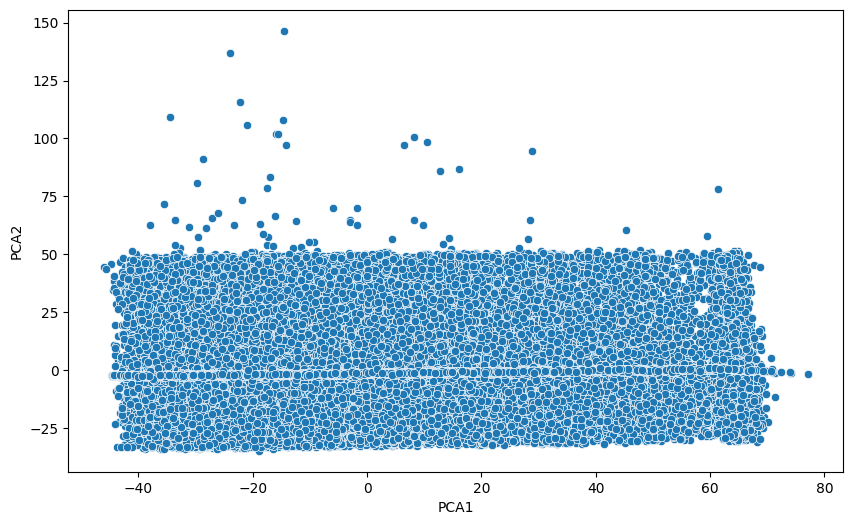

In [9]:
### Your code is here

plt.figure(figsize=(10,6))

sns.scatterplot(x=X_pca['PCA1'], y=X_pca['PCA2']);

In [13]:
print(pca.explained_variance_ratio_)

[0.63176117 0.21129863]


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


<Axes: >

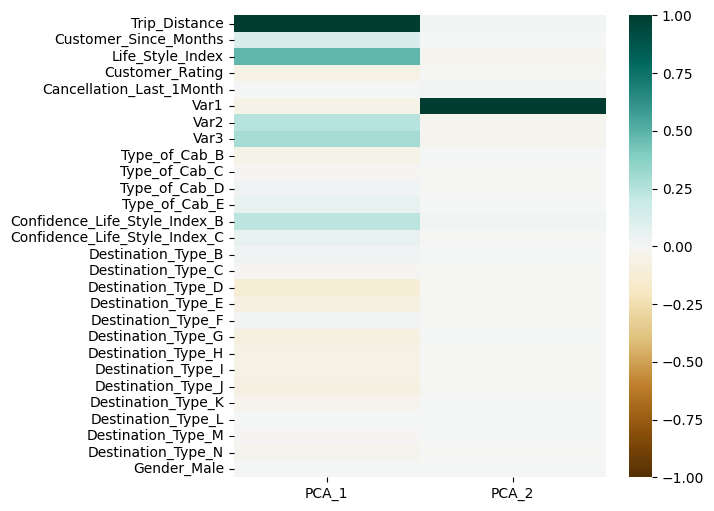

In [21]:
pc_1_corr = X.corrwith(X_pca['PCA1'])
pc_2_corr = X.corrwith(X_pca['PCA2'])

cors = pd.concat((pc_1_corr,pc_2_corr), axis=1)
cors.columns = ['PCA_1', 'PCA_2']

plt.figure(figsize=(6,6))
sns.heatmap(cors,vmin=-1,

            cmap='BrBG',
            vmax=1)

In [36]:
print(cors[cors>0.5].stack())

Trip_Distance  PCA_1    0.997767
Var1           PCA_2    0.998600
dtype: float64


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

<Axes: xlabel='PCA1', ylabel='PCA2'>

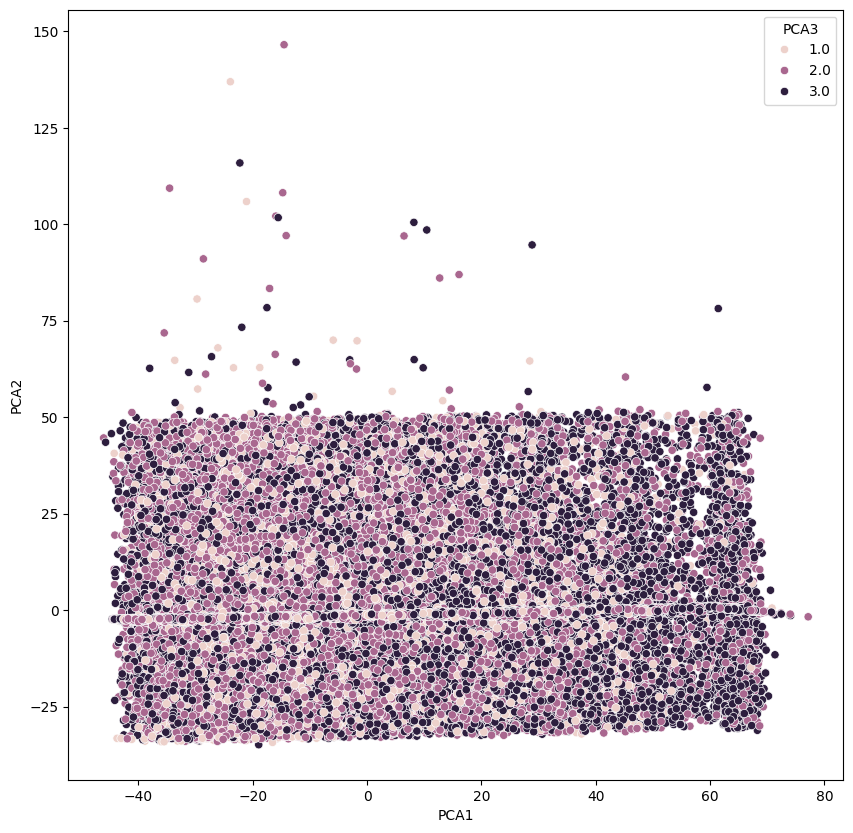

In [42]:
### Your code is here

pca3 = np.concatenate((X_pca, y.values.reshape(-1,1)),axis=1)
pca3 = pd.DataFrame(pca3,columns=['PCA1','PCA2','PCA3'])

plt.figure(figsize=(10,10))

sns.scatterplot(data=pca3, x='PCA1', y='PCA2', hue='PCA3')

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [47]:
### Your code is here

pca = PCA(n_components=3)

pca3= pca.fit_transform(X_centered)
X_pca = pd.DataFrame(pca3, columns=['PCA_1', 'PCA_2','PCA_3'])
X_pca.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


<Axes: >

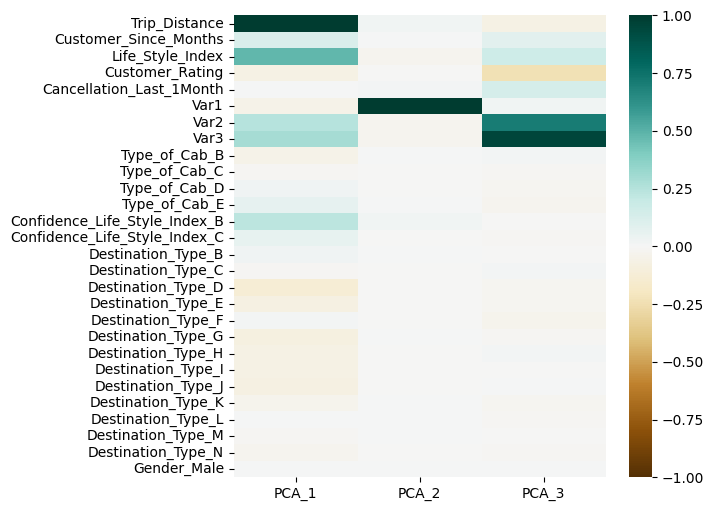

In [48]:
pc_1_corr = X.corrwith(X_pca['PCA_1'])
pc_2_corr = X.corrwith(X_pca['PCA_2'])
pc_3_corr = X.corrwith(X_pca['PCA_3'])

cors = pd.concat((pc_1_corr,pc_2_corr,pc_3_corr), axis=1)
cors.columns = ['PCA_1', 'PCA_2', 'PCA_3']

plt.figure(figsize=(6,6))
sns.heatmap(cors,vmin=-1,

            cmap='BrBG',
            vmax=1)

In [55]:
X_pca.corr()

,PCA_1,PCA_2,PCA_3
PCA_1,1.000000e+00,-9.123106e-17,-1.997123e-16
PCA_2,-9.123106e-17,1.000000e+00,6.015454e-17
PCA_3,-1.997123e-16,6.015454e-17,1.000000e+00


In [65]:
pca = PCA(n_components=3)

pca3= pca.fit_transform(X_centered)

X_pca = pd.DataFrame(pca3, columns=['PCA_1', 'PCA_2','PCA_3'])
pca3 = np.concatenate((X_pca.values, y.values.reshape(-1,1)),axis=1)
pca3 = pd.DataFrame(pca3,columns=['PCA_1', 'PCA_2','PCA_3','y'])
pca3.head()


,PCA_1,PCA_2,PCA_3,y
0,-38.743132,-23.282634,-11.303274,2.0
1,-13.209252,-25.023815,5.664106,2.0
2,-2.004910,-1.637085,3.663032,2.0
3,17.178458,-0.907657,-3.191676,3.0
4,14.477389,-11.656752,22.999348,2.0


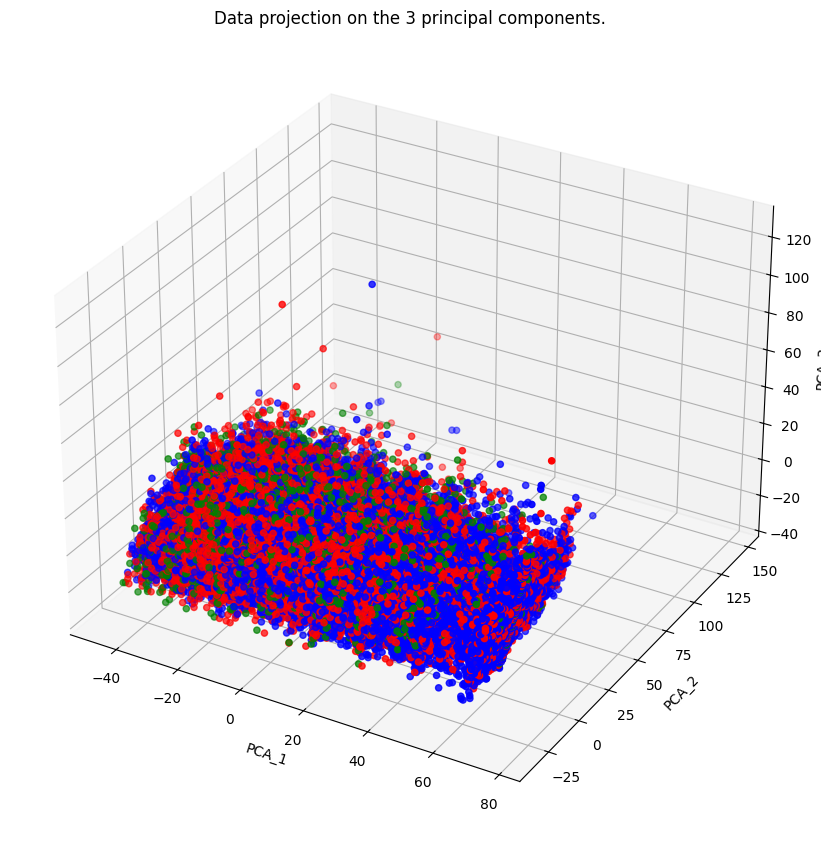

In [66]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.title("Data projection on the 3 principal components.")
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")

colors = pca3['y'].replace([1, 2, 3], ['green', 'red', 'blue'])

ax.scatter(pca3['PCA_1'], 
           pca3['PCA_2'], 
           pca3['PCA_3'], c=colors)

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [67]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [69]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}





In [70]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('pca', PCA(n_components=2)),
                 ('model', LogisticRegression())])

In [71]:
grid = GridSearchCV(pipe, param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']})

In [72]:
print(f"Best parameters: {grid.best_params_}")
print(f"Best score ACC: {grid.best_score_}")
print(classification_report(y_test, grid.predict(X_test),digits=3))

Best parameters: {'model__C': 0.0001, 'model__penalty': 'l2'}
Best score ACC: 0.4807413040642287
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.692     0.566     11349
           3      0.494     0.509     0.501      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.386     0.484     0.427     26333



In [73]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression())])
grid = GridSearchCV(pipe, param_grid,cv=5)
grid.fit(X_train,y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best score ACC: {grid.best_score_}")
print(classification_report(y_test, grid.predict(X_test),digits=3))

Best parameters: {'model__C': 0.01, 'model__penalty': 'l2'}
Best score ACC: 0.6804204100868297
              precision    recall  f1-score   support

           1      0.737     0.538     0.622      5372
           2      0.637     0.826     0.719     11349
           3      0.735     0.588     0.653      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [74]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [75]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    accu, f1 = train_pca_i(n_components,X_train,y_train)
    accuracy_dict[n_components]= accu
    f1_score_dict[n_components] = f1
    

CPU times: total: 33.7 s
Wall time: 33.4 s


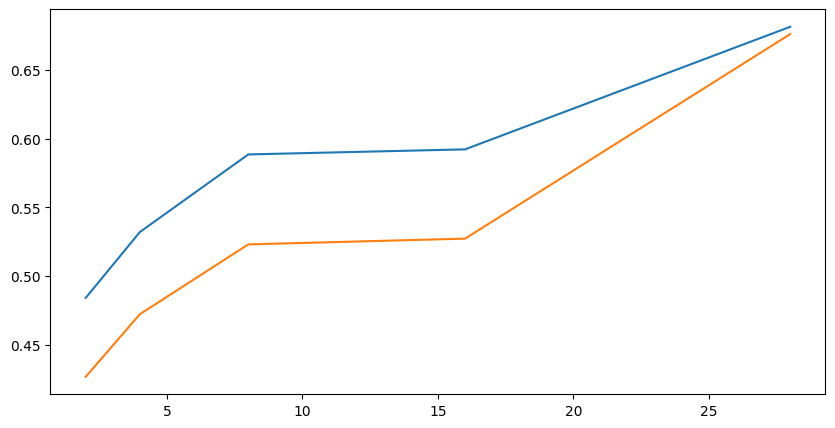

In [78]:
plt.figure(figsize=(10,5))
plt.plot(components_list, accuracy_dict.values(), label='Accuracy')
plt.plot(components_list, f1_score_dict.values(), label='f1-score')

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [6]:
from sklearn.manifold import TSNE

### Your code is here



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [7]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!